In [49]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

## Loading data from threads. 

In [50]:
fileName = "https://thredds.aodn.org.au/thredds/dodsC/IMOS/ANMN/NSW/CH100/Temperature/IMOS_ANMN-NSW_TZ_20210726T215000Z_CH100_FV01_CH100-2107-Aqualogger-AQUAlogger-520T-max1000m-28_END-20211102T220000Z_C-20211117T033150Z.nc"
nc = xr.open_dataset(fileName)
print(nc)  # change this to just `nc` for a more interactive view when running the notebook

<xarray.Dataset>
Dimensions:                (TIME: 29569)
Coordinates:
  * TIME                   (TIME) datetime64[ns] 2021-07-25T13:00:00.00000665...
    LATITUDE               float64 ...
    LONGITUDE              float64 ...
    NOMINAL_DEPTH          float32 ...
Data variables:
    TIMESERIES             int32 ...
    TEMP                   (TIME) float32 ...
    TEMP_quality_control   (TIME) float32 ...
    DEPTH                  (TIME) float32 ...
    DEPTH_quality_control  (TIME) float32 ...
Attributes: (12/54)
    abstract:                      NSW-IMOS Coffs Harbour 100m Mooring
    acknowledgement:               Any users of IMOS data are required to cle...
    author:                        Austin, Timothy
    author_email:                  t.austin@unsw.edu.au
    cdm_data_type:                 Station
    citation:                      The citation in a list of references is: "...
    ...                            ...
    time_deployment_end_origin:    TimeLastInPos
   

### Just trying to understand how this file looks like

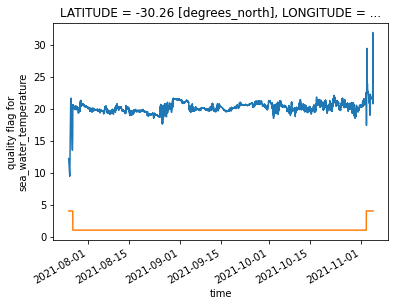

In [51]:
nc.TEMP.plot()
nc.TEMP_quality_control.plot()

#### Naming the two variables we want to work with, the manual qc flags and the temperature dataset

In [52]:
temp=nc.TEMP;
temp_flags=nc.TEMP_quality_control;

#### Creating the mask

In [53]:
temp_mask=temp_flags
temp_mask[np.where(temp_mask!=1)]= np.nan

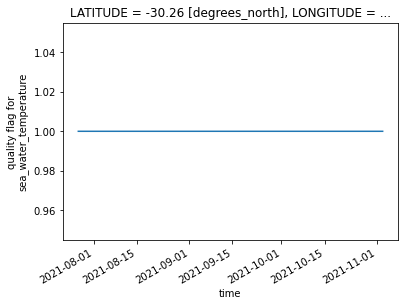

In [54]:
temp_mask.plot()

#### Now we have to apply the mask on the temperature dataset, creating a new set to be plotted on top.

In [55]:
temp_off= temp*temp_mask

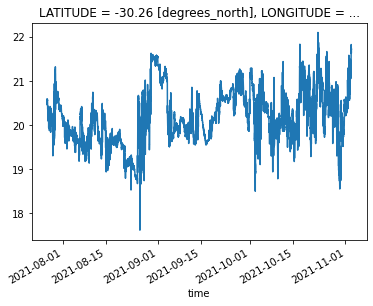

In [56]:
temp_off.plot()

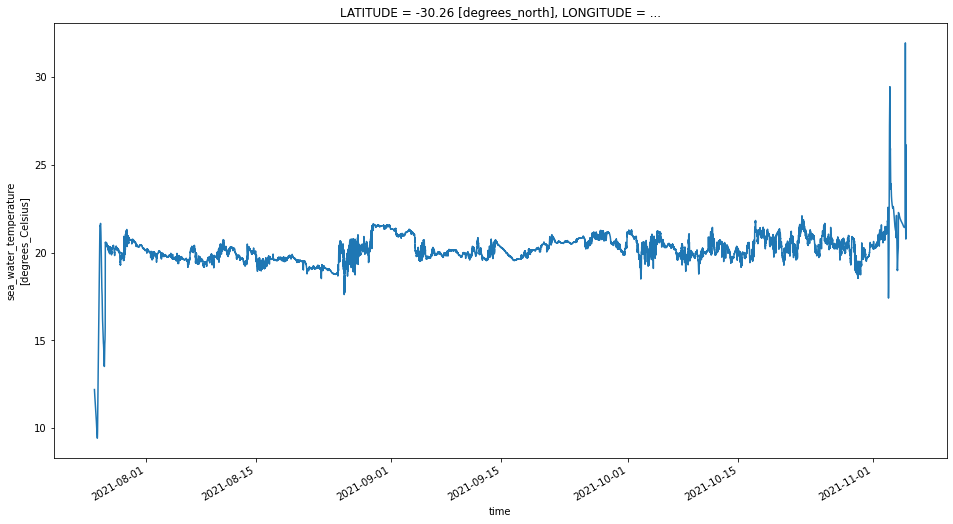

In [18]:
nc.TEMP.plot(hue='DEPTH', add_legend=True, figsize=(16,8))
temp_off.plot()